<a href="https://colab.research.google.com/github/yashwant-BE/Qam/blob/main/robo_flow_pest_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: to mount the google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.1/922.1 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
dataset_path = "/content/dataset"


In [6]:
import os
import zipfile

# Define paths
zip_path = "/content/Pest Detection.v1i.yolov8.zip"
extract_path = "/content/Pest_Detection_Dataset"

# Unzip if not already extracted
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

# Verify extraction
print("Extracted files:", os.listdir(extract_path))


Extracted files: ['README.roboflow.txt', 'README.dataset.txt', 'valid', 'train', 'data.yaml', 'test']


In [7]:
dataset_path = "/content/drive/MyDrive/Pest_Detection_Dataset"


In [9]:
import os

dataset_path = "/content/Pest_Detection_Dataset"
print("Files in dataset directory:", os.listdir(dataset_path))


Files in dataset directory: ['README.roboflow.txt', 'README.dataset.txt', 'valid', 'train', 'data.yaml', 'test']


In [10]:
data_yaml = "/content/Pest_Detection_Dataset/data.yaml"

from ultralytics import YOLO

model = YOLO("yolov8m.pt")  # Load YOLOv8 Medium model
model.train(
    data=data_yaml,    # Correct path to dataset YAML
    epochs=100,
    batch=16,
    imgsz=640,
    device="cuda"
)


Ultralytics 8.3.81 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Pest_Detection_Dataset/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

100%|██████████| 755k/755k [00:00<00:00, 23.8MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 83.7MB/s]


AMP: checks passed ✅


train: Scanning /content/Pest_Detection_Dataset/train/labels... 2724 images, 6 backgrounds, 1 corrupt: 100%|██████████| 2724/2724 [00:01<00:00, 2466.26it/s]

train: WARNING ⚠️ /content/Pest_Detection_Dataset/train/images/StemBorerImage272_jpg.rf.ac3cffb8c396f92c87fa54a9cd3afed4.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0038]


train: New cache created: /content/Pest_Detection_Dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/Pest_Detection_Dataset/valid/labels... 266 images, 2 backgrounds, 0 corrupt: 100%|██████████| 266/266 [00:00<00:00, 815.47it/s]

val: New cache created: /content/Pest_Detection_Dataset/valid/labels.cache


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.35G      1.655      2.624      1.983          9        640: 100%|██████████| 171/171 [01:29<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.94it/s]


                   all        266        265      0.391      0.134     0.0794     0.0282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.38G      1.819      2.527      2.081          7        640: 100%|██████████| 171/171 [01:31<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.93it/s]

                   all        266        265     0.0874      0.279     0.0702     0.0171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      6.38G      1.813       2.52      2.062          5        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.93it/s]

                   all        266        265      0.445      0.269       0.13     0.0457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.38G      1.774      2.435      2.022          8        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.90it/s]

                   all        266        265      0.237      0.401      0.263      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.39G      1.733      2.365      1.984         10        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.91it/s]

                   all        266        265      0.288      0.423      0.287      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.28G      1.704      2.268      1.957         10        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.43it/s]

                   all        266        265      0.267      0.435      0.296      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.38G      1.661       2.21       1.91          6        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.90it/s]

                   all        266        265      0.607      0.263       0.35      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.36G      1.639      2.183      1.903          8        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.96it/s]

                   all        266        265      0.403      0.438      0.384      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.39G      1.616      2.089      1.873          7        640: 100%|██████████| 171/171 [01:30<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.98it/s]

                   all        266        265      0.441      0.455      0.407      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.29G      1.598      2.104      1.862         10        640: 100%|██████████| 171/171 [01:30<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.95it/s]

                   all        266        265      0.424      0.445      0.388        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      6.37G       1.58      2.017       1.85          6        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.88it/s]

                   all        266        265      0.473      0.475      0.428      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.37G      1.566      1.976       1.83          9        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.89it/s]

                   all        266        265      0.463      0.402      0.412      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.38G      1.544      1.956      1.814         11        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.74it/s]


                   all        266        265      0.447      0.448      0.448      0.238

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       6.3G      1.547      1.924      1.816          3        640: 100%|██████████| 171/171 [01:30<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.81it/s]


                   all        266        265      0.549      0.477      0.512      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.37G      1.518      1.897      1.799          8        640: 100%|██████████| 171/171 [01:30<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.92it/s]

                   all        266        265      0.497      0.451      0.426      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.37G      1.516      1.878      1.796          5        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.97it/s]

                   all        266        265       0.59       0.46      0.498      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.38G      1.502      1.804      1.775         10        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.99it/s]

                   all        266        265      0.575      0.538       0.52      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.29G      1.493      1.792      1.768          9        640: 100%|██████████| 171/171 [01:30<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.93it/s]

                   all        266        265      0.541      0.523       0.53      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.36G      1.475      1.778      1.758          3        640: 100%|██████████| 171/171 [01:30<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all        266        265       0.69      0.469       0.55       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.36G      1.464      1.714      1.753         10        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.94it/s]

                   all        266        265      0.544      0.578      0.546      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       6.4G      1.447      1.685      1.723          7        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.98it/s]

                   all        266        265      0.599      0.487      0.547      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.29G      1.432       1.63      1.718          7        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.94it/s]

                   all        266        265      0.491      0.572      0.553      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.38G      1.421      1.623        1.7          6        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.83it/s]

                   all        266        265      0.654      0.572      0.603      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.36G        1.4      1.568      1.688          8        640: 100%|██████████| 171/171 [01:30<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        266        265       0.61      0.582      0.601      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.39G      1.406      1.593      1.695          5        640: 100%|██████████| 171/171 [01:30<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.52it/s]

                   all        266        265      0.677      0.589      0.634      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.29G      1.392      1.521      1.679          9        640: 100%|██████████| 171/171 [01:30<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.42it/s]

                   all        266        265      0.599      0.544      0.586      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.38G      1.381       1.53      1.673          8        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]

                   all        266        265      0.603      0.609      0.623       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.37G      1.356      1.474       1.66          6        640: 100%|██████████| 171/171 [01:30<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.44it/s]

                   all        266        265      0.665      0.511      0.594      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      6.39G      1.357      1.474      1.645          8        640: 100%|██████████| 171/171 [01:30<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.75it/s]

                   all        266        265       0.63      0.564      0.628      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.29G      1.344      1.433      1.642          9        640: 100%|██████████| 171/171 [01:30<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.83it/s]

                   all        266        265      0.742      0.512      0.613      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.37G      1.331      1.416      1.626          6        640: 100%|██████████| 171/171 [01:30<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.78it/s]


                   all        266        265      0.629       0.59      0.612      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.37G      1.306      1.352      1.612          8        640: 100%|██████████| 171/171 [01:30<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.99it/s]

                   all        266        265      0.702      0.556      0.621      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.39G      1.297       1.34      1.614          8        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.98it/s]

                   all        266        265      0.771      0.585      0.671      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       6.3G      1.272      1.285      1.592          9        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.96it/s]

                   all        266        265       0.65      0.632      0.644      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.37G      1.263      1.257      1.583          7        640: 100%|██████████| 171/171 [01:30<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.96it/s]

                   all        266        265       0.78      0.526      0.653      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      6.36G      1.279      1.256      1.593          7        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.96it/s]

                   all        266        265      0.691      0.606      0.618      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.38G      1.262      1.239      1.573         14        640: 100%|██████████| 171/171 [01:30<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.81it/s]

                   all        266        265      0.636      0.578      0.616      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.29G      1.236      1.214      1.549          7        640: 100%|██████████| 171/171 [01:30<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.65it/s]

                   all        266        265      0.656      0.579      0.592      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.37G      1.228      1.191      1.543          9        640: 100%|██████████| 171/171 [01:30<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.54it/s]

                   all        266        265      0.772      0.555      0.648      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.36G      1.213      1.164       1.54          8        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.48it/s]

                   all        266        265      0.683      0.581      0.654      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.39G      1.181      1.162      1.516          6        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.44it/s]

                   all        266        265      0.792      0.552      0.661      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.29G      1.193      1.157       1.52          9        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.99it/s]

                   all        266        265      0.769      0.597      0.676      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.38G      1.169      1.109      1.501          7        640: 100%|██████████| 171/171 [01:30<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.93it/s]

                   all        266        265      0.713      0.564      0.618      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.37G      1.164      1.084      1.492          5        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.98it/s]

                   all        266        265      0.733      0.541       0.64      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      6.38G      1.138      1.067      1.475          8        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.98it/s]

                   all        266        265      0.606      0.612      0.627       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.29G      1.133      1.039      1.466          6        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]

                   all        266        265      0.672      0.618      0.628      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.38G      1.113      1.009      1.454          5        640: 100%|██████████| 171/171 [01:30<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all        266        265      0.661      0.594      0.622      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.37G      1.089     0.9932      1.441          5        640: 100%|██████████| 171/171 [01:30<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all        266        265      0.777      0.548      0.656      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.39G      1.073     0.9687      1.422          6        640: 100%|██████████| 171/171 [01:30<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.77it/s]

                   all        266        265      0.682      0.625      0.663      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.29G      1.072      0.967      1.423          9        640: 100%|██████████| 171/171 [01:30<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.78it/s]

                   all        266        265       0.72      0.581      0.656      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.37G      1.038     0.9362        1.4          7        640: 100%|██████████| 171/171 [01:30<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.93it/s]

                   all        266        265      0.709      0.644      0.702      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.37G      1.022      0.904      1.387          5        640: 100%|██████████| 171/171 [01:30<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]

                   all        266        265      0.697      0.574      0.637      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.38G      1.036     0.9372      1.395          3        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.48it/s]

                   all        266        265      0.679      0.584      0.636      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       6.3G     0.9978     0.8836       1.37          9        640: 100%|██████████| 171/171 [01:30<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.74it/s]

                   all        266        265      0.619      0.652      0.649      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.37G     0.9914     0.8653       1.36          7        640: 100%|██████████| 171/171 [01:30<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.77it/s]


                   all        266        265      0.764      0.577       0.67      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.37G     0.9845      0.866      1.356          6        640: 100%|██████████| 171/171 [01:30<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.90it/s]

                   all        266        265      0.693      0.589      0.633      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.38G     0.9634     0.8224      1.333          8        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.91it/s]

                   all        266        265      0.696      0.587      0.641      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.29G     0.9479     0.8306      1.332          4        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.97it/s]

                   all        266        265      0.801      0.613      0.687      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.38G      0.945     0.8178      1.324         10        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  3.00it/s]

                   all        266        265      0.687       0.55      0.624      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      6.36G     0.9226     0.8012      1.311          7        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.99it/s]

                   all        266        265      0.781       0.62      0.672      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       6.4G     0.9211     0.7929      1.308          8        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.98it/s]

                   all        266        265      0.734      0.563      0.609      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.29G     0.8968     0.7813       1.29          5        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all        266        265      0.692      0.611      0.651      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.37G     0.8894     0.7746      1.286          6        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.38it/s]

                   all        266        265      0.718      0.651      0.663      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.37G     0.8823     0.7455      1.281          9        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.70it/s]

                   all        266        265      0.688      0.604      0.647      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.39G     0.8738     0.7444      1.266         10        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.74it/s]

                   all        266        265      0.719      0.584      0.622      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.29G      0.848     0.7269      1.251          7        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.93it/s]

                   all        266        265       0.76      0.562      0.661      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.38G     0.8442     0.7247      1.246          8        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  3.00it/s]

                   all        266        265      0.702      0.599      0.631      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.37G     0.8332     0.7017      1.239          7        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.97it/s]

                   all        266        265       0.65      0.631      0.644      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.39G     0.8178     0.6706      1.225          9        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.00it/s]

                   all        266        265      0.672      0.608      0.617      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.29G     0.8024     0.6878       1.22          6        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  3.00it/s]

                   all        266        265       0.68      0.651      0.648      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.38G     0.7949     0.6701       1.22          9        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.96it/s]

                   all        266        265      0.651      0.622      0.619      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.37G     0.7799      0.648      1.205          5        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.98it/s]

                   all        266        265      0.749      0.566      0.637      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.38G     0.7711     0.6424      1.198          7        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.63it/s]

                   all        266        265      0.681      0.668      0.664      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.29G     0.7717     0.6632      1.202          7        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.49it/s]

                   all        266        265       0.68      0.653      0.651      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.37G     0.7547     0.6382      1.192          8        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.45it/s]


                   all        266        265      0.708      0.603      0.643      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.37G     0.7499     0.6275      1.189          7        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.74it/s]

                   all        266        265      0.715       0.54      0.613      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.38G     0.7494     0.6292      1.181          6        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.92it/s]

                   all        266        265      0.692      0.596      0.638      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.29G     0.7269     0.6069      1.166          7        640: 100%|██████████| 171/171 [01:30<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  3.00it/s]

                   all        266        265      0.648       0.65      0.652      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.38G     0.7211      0.604      1.169          8        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.97it/s]

                   all        266        265      0.688      0.569      0.611      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.37G     0.7175     0.6057      1.167          9        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.98it/s]

                   all        266        265      0.703      0.601      0.646      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100       6.4G     0.6974     0.5782       1.15         10        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.00it/s]

                   all        266        265      0.731      0.558      0.647      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.28G     0.6936     0.5862      1.147         10        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.01it/s]

                   all        266        265      0.688      0.598      0.644      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.38G     0.6776     0.5563      1.134         10        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.72it/s]

                   all        266        265      0.671      0.594      0.633      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.37G     0.6875     0.5692      1.145          7        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.47it/s]

                   all        266        265      0.607      0.639       0.63      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.39G     0.6683     0.5546      1.125          6        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.51it/s]

                   all        266        265      0.613      0.618      0.625      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.29G     0.6672     0.5529      1.134          8        640: 100%|██████████| 171/171 [01:30<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.84it/s]

                   all        266        265      0.703       0.59      0.633      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.39G     0.6688     0.5537      1.139          7        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.94it/s]

                   all        266        265      0.679      0.645      0.653      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.36G     0.6439     0.5301      1.119         10        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.99it/s]

                   all        266        265      0.652      0.616      0.633      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.38G     0.6408     0.5375      1.113          7        640: 100%|██████████| 171/171 [01:31<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.00it/s]

                   all        266        265      0.639      0.655      0.639      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.29G     0.6308     0.5265      1.111          4        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.95it/s]

                   all        266        265      0.669      0.618      0.626      0.319


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      6.38G     0.5333     0.3431      1.082          3        640: 100%|██████████| 171/171 [01:31<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.73it/s]

                   all        266        265      0.623      0.628      0.628      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      6.36G     0.4755     0.2873      1.021          3        640: 100%|██████████| 171/171 [01:30<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all        266        265      0.685      0.615      0.655      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.39G     0.4637     0.2891       1.02          3        640: 100%|██████████| 171/171 [01:30<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.53it/s]

                   all        266        265      0.706      0.615       0.65      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.29G     0.4488     0.2693      1.008          3        640: 100%|██████████| 171/171 [01:30<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.86it/s]

                   all        266        265      0.664      0.617      0.645      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.38G     0.4397     0.2719     0.9977          3        640: 100%|██████████| 171/171 [01:30<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.94it/s]

                   all        266        265      0.746      0.585       0.65       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.36G      0.433     0.2628      0.999          3        640: 100%|██████████| 171/171 [01:30<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.99it/s]

                   all        266        265      0.736      0.577      0.643      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.38G     0.4287     0.2579     0.9896          3        640: 100%|██████████| 171/171 [01:30<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.01it/s]

                   all        266        265      0.669      0.604      0.644      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.29G     0.4089     0.2492     0.9742          3        640: 100%|██████████| 171/171 [01:30<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.02it/s]

                   all        266        265      0.724      0.586      0.638      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      6.37G     0.4104     0.2491     0.9731          3        640: 100%|██████████| 171/171 [01:30<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.98it/s]

                   all        266        265      0.707      0.587      0.632       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      6.37G     0.4002     0.2458     0.9724          3        640: 100%|██████████| 171/171 [01:30<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all        266        265      0.717      0.592      0.642      0.331



100 epochs completed in 2.675 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 52.0MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.81 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.12it/s]


                   all        266        265      0.711      0.646      0.703      0.358
             FruitMoth         72         73      0.778      0.816      0.835      0.528
            Gall.Flies         79         79      0.633      0.506      0.559      0.283
                Locust         29         29      0.696      0.655      0.719      0.377
            stem.Borer         84         84      0.735      0.607      0.697      0.245
Speed: 0.3ms preprocess, 8.3ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e445b880b90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [11]:
# Save the best trained model to Google Drive
best_model_path = "/content/runs/detect/train/weights/best.pt"
drive_model_path = "/content/drive/MyDrive/Pest_Detection_Model/best.pt"

# Create directory in Google Drive if not exists
os.makedirs(os.path.dirname(drive_model_path), exist_ok=True)

# Copy the best model to Google Drive
import shutil
shutil.copy(best_model_path, drive_model_path)

print(f"Model saved at: {drive_model_path}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/train/weights/best.pt'

In [12]:
import os

# Check if the runs directory exists
runs_path = "/content/runs/detect/"
if os.path.exists(runs_path):
    print("Available runs:", os.listdir(runs_path))

    # Check inside 'train' directory
    train_path = os.path.join(runs_path, "train/weights/")
    if os.path.exists(train_path):
        print("Available weights:", os.listdir(train_path))
    else:
        print("Training directory not found. Check if training was completed.")
else:
    print("YOLO training runs directory not found.")


Available runs: ['train', 'train2', 'train3']
Available weights: []


In [13]:
import os

runs_path = "/content/runs/detect/"
for run in ["train", "train2", "train3"]:
    weights_path = os.path.join(runs_path, run, "weights/")
    if os.path.exists(weights_path):
        print(f"Weights in {run}:", os.listdir(weights_path))


Weights in train: []
Weights in train2: []
Weights in train3: ['best.pt', 'last.pt']


In [22]:
import shutil

# Correct path to the trained model
best_model_path = "/content/runs/detect/train3/weights/best.pt"
drive_model_path = "/content/drive/MyDrive/Pest_Detection_Model/best.pt"

# Create the directory in Google Drive if it doesn't exist
os.makedirs(os.path.dirname(drive_model_path), exist_ok=True)

# Copy the best model to Google Drive
shutil.copy(best_model_path, drive_model_path)

print(f"Model saved at: {drive_model_path}")


Model saved at: /content/drive/MyDrive/Pest_Detection_Model/best.pt


In [17]:
import os

image_path = "/beetle-8935561_1280.jpg"
if os.path.exists(image_path):
    print("Image found!")
else:
    print("Image not found. Please upload or check the path.")


Image found!


In [18]:
import os

image_path = "/beetle-8935561_1280.jpg"  # Update this path if needed

if os.path.exists(image_path):
    print("Image found!")
else:
    print("Image not found. Check the correct path.")


Image found!


In [19]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
image_path = "/content/drive/MyDrive/beetle-8935561_1280.jpg"


In [32]:
import os

image_path = "/content/Pest_Detection_Dataset/test/images/FruitMothImage108_jpeg.rf.a07ad262bf5aa65fe0892c108b9c63fb.jpg"

if os.path.exists(image_path):
    print("Image found!")
else:
    print("Image not found. Check if it's uploaded to Google Drive.")


Image found!


In [31]:
image_path = "/content/beetle-8935561_1280.jpg"


In [34]:
from ultralytics import YOLO

# Load the trained YOLO model from Google Drive
model_path = "/content/drive/MyDrive/Pest_Detection_Model/best.pt"
model = YOLO(model_path)

# Correct image path
image_path = "/content/Pest_Detection_Dataset/test/images/FruitMothImage108_jpeg.rf.a07ad262bf5aa65fe0892c108b9c63fb.jpg"

# Perform inference
results = model(image_path)

# Show the results
results.show()



image 1/1 /content/Pest_Detection_Dataset/test/images/FruitMothImage108_jpeg.rf.a07ad262bf5aa65fe0892c108b9c63fb.jpg: 640x448 (no detections), 27.9ms
Speed: 1.8ms preprocess, 27.9ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 448)


AttributeError: 'list' object has no attribute 'show'

In [35]:
results = model(image_path, conf=0.2)  # Reduce confidence threshold to 0.2



image 1/1 /content/Pest_Detection_Dataset/test/images/FruitMothImage108_jpeg.rf.a07ad262bf5aa65fe0892c108b9c63fb.jpg: 640x448 1 Gall.Flies, 27.3ms
Speed: 2.4ms preprocess, 27.3ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 448)


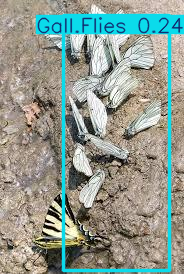

In [36]:
for result in results:
    result.show()



image 1/1 /content/Pest_Detection_Dataset/train/images/GallFlyImage18_jpg.rf.55f0958103e42e7fd5a8d8e60f7651f9.jpg: 640x608 1 Gall.Flies, 49.1ms
Speed: 3.0ms preprocess, 49.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 608)


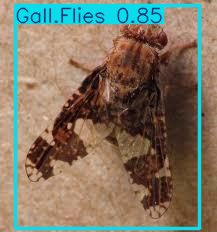

In [39]:
from ultralytics import YOLO

# Load the trained YOLO model
model_path = "/content/drive/MyDrive/Pest_Detection_Model/best.pt"
model = YOLO(model_path)

# Correct image path
image_path = "/content/Pest_Detection_Dataset/train/images/GallFlyImage18_jpg.rf.55f0958103e42e7fd5a8d8e60f7651f9.jpg"
# Perform inference with lower confidence threshold
results = model(image_path, conf=0.2)

# Show the results
for result in results:
    result.show()


In [41]:
import shutil

# Define paths
local_dataset_path = "/content/Pest_Detection_Dataset"  # Local dataset path
drive_dataset_path = "/content/drive/MyDrive/Pest_Detection_Dataset"  # Google Drive path

# Move dataset to Google Drive
shutil.move(local_dataset_path, drive_dataset_path)

print(f"Dataset saved at: {drive_dataset_path}")


Dataset saved at: /content/drive/MyDrive/Pest_Detection_Dataset


In [42]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define dataset and model paths
dataset_path = "/content/drive/MyDrive/Pest_Detection_Dataset"
model_path = "/content/drive/MyDrive/Pest_Detection_Model/best.pt"

# Ensure dataset is available
if os.path.exists(dataset_path):
    print("Dataset loaded successfully!")
else:
    print("Dataset not found. Please upload it to Google Drive.")

# Ensure model is available
if os.path.exists(model_path):
    print("Model loaded successfully!")
else:
    print("Model not found. Please upload it to Google Drive.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded successfully!
Model loaded successfully!



image 1/1 /content/drive/MyDrive/Pest_Detection_Dataset/test/images/FruitMothImage108_jpeg.rf.a07ad262bf5aa65fe0892c108b9c63fb.jpg: 640x448 1 Gall.Flies, 28.0ms
Speed: 2.4ms preprocess, 28.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 448)


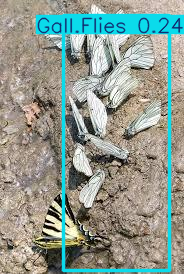

In [43]:
from ultralytics import YOLO

# Load pre-trained YOLO model
model = YOLO(model_path)  # No need to train again!

# Image path for testing
image_path = "/content/drive/MyDrive/Pest_Detection_Dataset/test/images/FruitMothImage108_jpeg.rf.a07ad262bf5aa65fe0892c108b9c63fb.jpg"

# Perform inference
results = model(image_path, conf=0.2)

# Show the results
for result in results:
    result.show()


In [44]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define dataset and model paths
dataset_path = "/content/drive/MyDrive/Pest_Detection_Dataset"
model_path = "/content/drive/MyDrive/Pest_Detection_Model/best.pt"

# Verify dataset exists
if os.path.exists(dataset_path):
    print("✅ Dataset is preloaded and available!")
    print("Dataset files:", os.listdir(dataset_path))  # Show dataset files
else:
    print("❌ Dataset not found! Please upload it to Google Drive.")

# Verify model exists
if os.path.exists(model_path):
    print("✅ Model weights are preloaded and available!")
else:
    print("❌ Model not found! Please train and save it in Google Drive.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Dataset is preloaded and available!
Dataset files: ['README.roboflow.txt', 'README.dataset.txt', 'valid', 'train', 'data.yaml', 'test']
✅ Model weights are preloaded and available!


✅ Model loaded successfully!
YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03

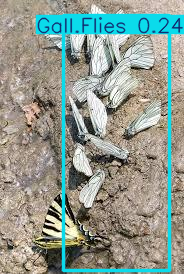

In [45]:
from ultralytics import YOLO

# Load pre-trained YOLO model
model = YOLO(model_path)  # No need to train again!

# Verify model details
print("✅ Model loaded successfully!")
print(model)  # Check model architecture

# Test image path (make sure this exists)
test_image = "/content/drive/MyDrive/Pest_Detection_Dataset/test/images/FruitMothImage108_jpeg.rf.a07ad262bf5aa65fe0892c108b9c63fb.jpg"

if os.path.exists(test_image):
    print("✅ Test image found! Running inference...")
    results = model(test_image, conf=0.2)

    # Show the results
    for result in results:
        result.show()
else:
    print("❌ Test image not found! Please check the path.")


In [46]:
# Mount Google Drive
drive.mount('/content/drive')

# Check if dataset & model exist, otherwise show error
assert os.path.exists(dataset_path), "❌ Dataset is missing! Upload it to Google Drive."
assert os.path.exists(model_path), "❌ Model weights are missing! Train and save them."

print("✅ Everything is preloaded! Ready for inference.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Everything is preloaded! Ready for inference.



image 1/1 /content/Pest_Detection_Dataset/test/images/FruitMothImage108_jpeg.rf.a07ad262bf5aa65fe0892c108b9c63fb.jpg: 640x448 1 Gall.Flies, 29.3ms
Speed: 2.7ms preprocess, 29.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 448)


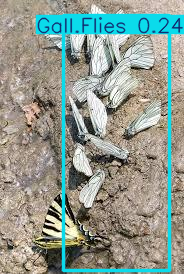

In [40]:
from ultralytics import YOLO

# Load the trained YOLO model from Google Drive
model_path = "/content/drive/MyDrive/Pest_Detection_Model/best.pt"
model = YOLO(model_path)  # No need to train again!

# Provide image path
image_path = "/content/Pest_Detection_Dataset/test/images/FruitMothImage108_jpeg.rf.a07ad262bf5aa65fe0892c108b9c63fb.jpg"

# Perform inference with lower confidence threshold
results = model(image_path, conf=0.2)

# Show the results
for result in results:
    result.show()
